### Prerequsites

In [ ]:
!pip install flair

In [6]:
# Import general modules for data processing
import pandas as pd
import seaborn as sns
print("Succesfully imported necessary modules")

Succesfully imported necessary modules


In [2]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [21]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_processed.csv'
with open(infile, 'r') as f:            
            corpus = pd.read_csv(f, encoding="UTF-8", usecols=['e_rara_id', 'clean_text', 'clean_text_length'], nrows=50, skiprows=[32,40]) #


In [22]:
round(corpus.clean_text_length.describe())

count         50.0
mean      219500.0
std       343786.0
min         8390.0
25%        45359.0
50%        95830.0
75%       235242.0
max      1821449.0
Name: clean_text_length, dtype: float64

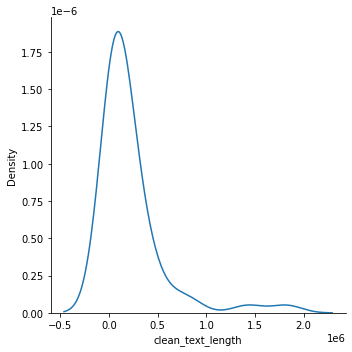

In [23]:
sns.displot(data=corpus, x='clean_text_length', kind="kde")

In [25]:
corpus.sort_values('clean_text_length')

,e_rara_id,clean_text,clean_text_length
36,17996385,Ehrerbietige Vorstellung des großen Kantonalve...,8390
39,22598462,Entwurf Gesetz über die Eorrection der Gewässe...,9640
27,11025076,Beschreibung von Thun und d-ß-n Umgegend nach ...,10991
37,10733431,Einige Worte betreffend Drückt illÄ neuen SMge...,11019
7,11218655,Ansstellung alten Bildern ans Prmttaitz Kunstm...,17451
41,7312808,Die erste und Werke Verner Ballgesellschaft Be...,22114
42,12751751,M-o Den Kollekte-Freunden für innere Missm Mär...,26094
19,22562760,bricht unö das Koitzefflonsgesuch des Hrn Schn...,26379
17,9044148,Bericht über die der Engepromenade bey Bern be...,34557
35,10826352,Vaeia 167 Ehrerbietige Vorstellung den Großen ...,36755


### Apply NER tagger model

In [ ]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_processed.csv'
with open(infile, 'r') as f:            
            corpus = pd.read_csv(f, encoding="UTF-8", usecols=['e_rara_id', 'clean_text', 'clean_text_length'])


In [ ]:
corpus = corpus.rename(columns={"LOC_ner-multi-fast": "ner-multi-fast-I"})

In [130]:
corpus[39:40]

,e_rara_id,clean_text,clean_text_length
39,22598462,Entwurf Gesetz über die Eorrection der Gewässe...,9640


In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load the NER tagger
# See available sentence tagger: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_2_TAGGING.md#list-of-pre-trained-sequence-tagger-modelsentence 
tagger = SequenceTagger.load('flair/ner-multi-fast')  # size: 1.51 GB

2021-04-06 13:16:05,893 loading file /root/.flair/models/ner-multi-fast/d0ca1daace2b097b04a886b4be80d82634229555eb2da7079b1b102579fd3835.7b305379b36567738bc455e399f4a4b341d8db8edabffc6807a0ff9cc4efb933


In [ ]:
#Import segtok library to split the paragraph into sentences
from segtok.segmenter import split_single

corpus['ner-multi-fast'] = ''
for index in corpus.index[125:130]:
    # use splitter to split text into list of sentences
    sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(corpus['clean_text'][index])]   
    tagger.predict(sentences)   # predict tags for sentences
    loc_ents = []
    for s in sentences:
        for token in s.tokens:
            tag = token.get_tag('ner')
            if tag.value in ['S-LOC', 'B-LOC', 'E-LOC', 'I-LOC']:
                loc_ents.append([token.text, tag.value])
                corpus['ner-multi-fast'][index] = loc_ents
    # Write to Google Drive
    %cd /content/drive/My\ Drive/e_rara_fulltexts/bernensia
    outfile = "./corpus_bernensia_ger_LOC_ner-multi-fast-I-125.csv"
    with open(outfile, "w") as f:
        corpus.to_csv(f, index=False, columns=['e_rara_id', 'clean_text_length', 'ner-multi-fast'])
    %cd /content/
    print("Saved to file {} to Google Drive.".format(index))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file 125 to Google Drive.
/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file 126 to Google Drive.
/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file 127 to Google Drive.
/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file 128 to Google Drive.
/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file 129 to Google Drive.


In [ ]:
corpus[30:35]

In [ ]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_fulltexts/bernensia
outfile = "./corpus_bernensia_ger_LOC_ner-multi-fast-I.csv"
with open(outfile, "w") as f:
    corpus.to_csv(f, index=False, columns=['e_rara_id', 'ner-multi-fast-I'])
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file to Google Drive.


In [ ]:
#Import segtok library to split the paragraph into sentences
from segtok.segmenter import split_single

sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(corpus['clean_text'][0])]

#predicting entities
tagger.predict(sentences[0:5])# print the entities with below command
for sent in sentences:
    for entity in sent.get_spans('ner'):
        print(entity)

In [ ]:
#Import segtok library to split the paragraph into sentences
#from segtok.segmenter import split_single

sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(corpus['clean_text'][0][0:500])]

#predicting entities
tagger.predict(sentences[0:500])# print the entities with below command
for sent in sentences:
    for token in sent.tokens:
            tag = token.get_tag('ner')
            if tag.value in ['S-LOC', 'B-LOC', 'E-LOC']:
                print([token.text, tag.value])

## LOC Analysis: SpaCy

In [ ]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

In [102]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_LOC_spacy_text_full.csv'
with open(infile, 'r') as f:            
            loc = pd.read_csv(f, encoding="UTF-8", usecols=['e_rara_id', 'clean_text_length', 'spacy_concat'], nrows=50, skiprows=[32,40])

In [50]:
print(loc['spacy_concat'][4:5])

4    AlimMk, Armenwesen, Bern, Stadt, Ersparnißkass...
Name: spacy_concat, dtype: object


In [103]:
loc = loc.rename(columns={"spacy_concat": "spacy"})

loc['spacy_count'] = 0      # number of LOCs
loc['spacy_ucount'] = 0     # number of unique LOCs
loc['spacy_list'] = '' 
loc['spacy_set'] = ''       # unique LOCs; set = unique values of list   # https://realpython.com/python-sets/
for i in loc.index:
    loc['spacy_list'][i] = loc.spacy[i].split(', ')     # change spacy (str) to  list
    loc['spacy_count'][i] = len(loc.spacy_list[i])
    loc['spacy_set'][i] = set(loc.spacy_list[i])
    loc['spacy_ucount'][i] = len(loc.spacy_set[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [131]:
for i in loc[39:40].spacy_list:
    print(i)

['Juragewässer-', 'Ueberschwemmungen', 'Möösern', 'Seelandes', 'Bieler-', 'Aare', 'Aare', 'Aarberg', 'Büren', 'Leugeneu', 'Ausmündung', 'Aare', 'Großen Mooses Obermoos', 'Aarberg', 'Nidau', 'Erlach', 'Kantonen', 'Bund', 'Bundes', 'Mehrwerth', 'Privaten Corrections- und Entsumpfungsge-', 'Bundes', 'Landes', 'Grundeigenthums', 'Zinsfüße', 'Zinsbetreffniß', 'Regierungs-Rath', 'Der Staat', 'Vund', 'Aare', 'Büren', 'Morgenthal', 'Zihl', 'Neuen- burger- und Bielersee', 'Parthieen', 'Großen Mooses Uutermoos', 'Mitgäbe', 'Kantonen', 'Bern']


In [153]:
for i in loc[39:40].e_rara_id:
    print(i)

22598462


#### with 50's set

In [71]:
spacy_lens = []
for i in range(0,50):
    for j in range(0, loc.spacy_count[i]):
        spacy_lens.append(len(loc.spacy_list[i][j]))

[26, 9, 4, 10, 8, 3, 7, 18, 10, 4]

In [78]:
pd.Series(spacy_lens).describe()

count    73174.000000
mean         9.613018
std          6.150706
min          0.000000
25%          5.000000
50%          9.000000
75%         12.000000
max        147.000000
dtype: float64

### write to file

In [ ]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_spacy.csv"
with open(outfile, "w") as f:
    loc.to_csv(f, index=False)   # columns=['e_rara_id', 'ner-multi-fast-I']
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


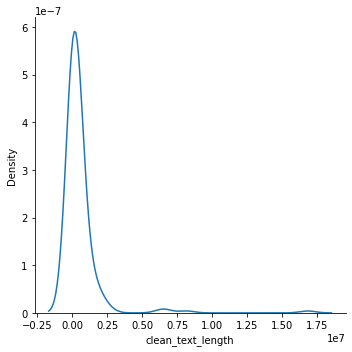

In [ ]:
sns.displot(data=loc, x='clean_text_length', kind="kde")

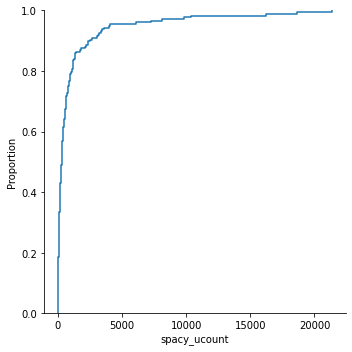

In [ ]:
sns.displot(data=loc, x='spacy_ucount', kind="ecdf")

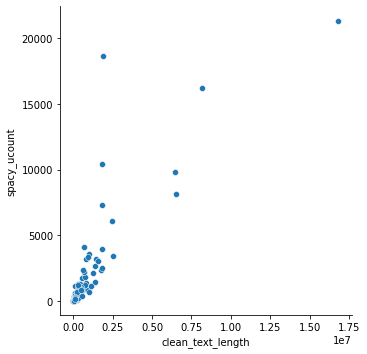

In [ ]:
sns.relplot(x='clean_text_length', y='spacy_ucount', data=loc)

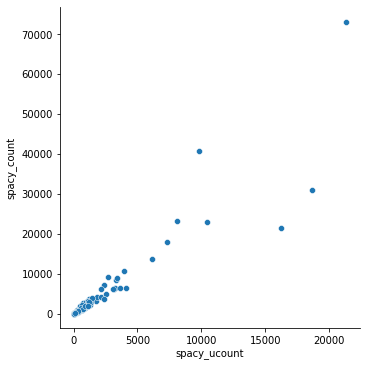

In [ ]:
sns.relplot(x='spacy_ucount', y='spacy_count', data=loc)

In [ ]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Analysis File

In [47]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_spacy.csv'
with open(infile, 'r') as f:            
            loc = pd.read_csv(f, encoding="UTF-8", nrows=50, skiprows=[32,40])

In [39]:
loc.head(3)

,e_rara_id,clean_text_length,spacy,spacy_count,spacy_ucount,spacy_list,spacy_set
0,14432690,46334,"Staat Missouri Nordamerika, Diefibach, Thun, T...",95,73,"['Staat Missouri Nordamerika', 'Diefibach', 'T...","{'', 'Erde', 'Lebet', 'Umschlinge', 'Hin', 'Fo..."
1,1757509,49807,"Stadt Bern, Bern, Postgaße, Jnsclgaße, Brunn, ...",392,258,"['Stadt Bern', 'Bern', 'Postgaße', 'Jnsclgaße'...","{'', 'Altenberg', 'Keilbach', 'Christian', 'Ki..."
2,1397203,830914,"Adrettenbuch, Beru, Stadt, Bern, Anstände, Rep...",6090,3165,"['Adrettenbuch', 'Beru', 'Stadt', 'Bern', 'Ans...","{'', 'Rathhauses', 'Bütscheleck', 'Vuicle', 'G..."


'z'

In [ ]:
round(loc.clean_text_length.describe())

count         50.0
mean      219500.0
std       343786.0
min         8390.0
25%        45359.0
50%        95830.0
75%       235242.0
max      1821449.0
Name: clean_text_length, dtype: float64

In [ ]:
round(loc.spacy_ucount.describe())

count       50.0
mean       718.0
std       1571.0
min         10.0
25%         71.0
50%        229.0
75%        644.0
max      10417.0
Name: spacy_ucount, dtype: float64

In [ ]:
type(loc.spacy[3:4])


pandas.core.series.Series

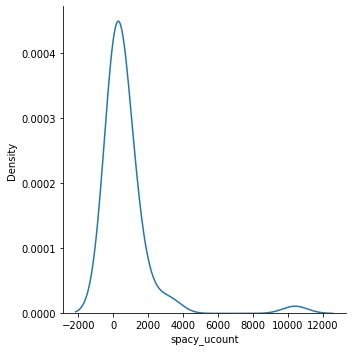

In [ ]:
sns.displot(data=loc, x='spacy_ucount', kind="kde")

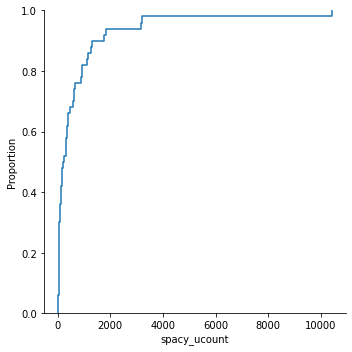

In [ ]:
sns.displot(data=loc, x='spacy_ucount', kind="ecdf")

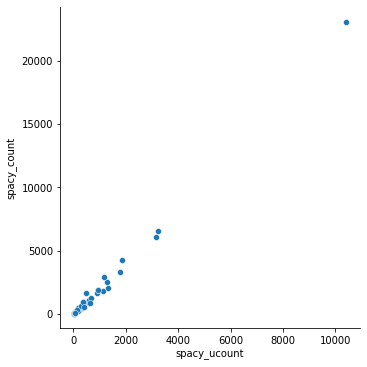

In [ ]:
sns.relplot(x='spacy_ucount', y='spacy_count', data=loc)

## LOC Analysis: Flair ner-multi-fast

In [ ]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

In [134]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_LOC_ner-multi-fast-I-full-1.csv'
with open(infile, 'r') as f:            
            loc2 = pd.read_csv(f, encoding="UTF-8", keep_default_na=False, usecols=['e_rara_id', 'clean_text_length', 'ner-multi-fast_concat'], nrows=50, skiprows=[32,40])

In [119]:
loc2[36:43]

,e_rara_id,clean_text_length,ner-multi-fast_concat
36,17996385,8390,"Bern, Republik Bern, Canton Bern, Nothdurft..."
37,10733431,11019,"Bern, Bern, Bern, Bern, Neuenburg, SLOC"
38,15213334,225934,"Bern, Bern, Bern, Kanton Born, Emmental, ..."
39,22598462,9640,"Seelandes, Aare, Aare, Aarberg, Büren, Aa..."
40,7646616,51164,"Marktgasse, Bern, Burgerspital, Judengasse,..."
41,7312808,22114,"Bern, Salzmagazin, Marzilithor, Bernerhof, ..."
42,12751751,26094,"Bern, Bern, Dießbach, Bern, Bern, Matte B..."


In [136]:
for i in loc2[39:40].flair_list:
    print(i)

['Seelandes', 'Aare', 'Aare', 'Aarberg', 'Büren', 'Aare', 'Mooses Obermoos', 'Aarberg Nidau', 'Erlach', 'Bern', 'Großen Rathe', 'Aare', 'Büren', 'Morgenthal', 'Bielersee', 'Mooses Uutermoos', 'Bern, SLOC']


In [115]:
loc2.flair[36]

'Bern,  Republik Bern,  Canton Bern,  Nothdurft,  Solothurn,  Nothdurft, SLOC'

In [135]:
loc2 = loc2.rename(columns={"ner-multi-fast_concat": "flair"})

loc2['flair_count'] = 0      # number of LOCs
loc2['flair_ucount'] = 0     # number of unique LOCs
loc2['flair_set'] = ''       # unique LOCs; set = unique values of list   # https://realpython.com/python-sets/
loc2['flair_list'] = '' 
for i in loc2.index:
    loc2['flair_list'][i] = loc2.flair[i].split(',  ')   # change spacy (str) to  list
    loc2['flair_set'][i] = set(loc2.flair_list[i])
    loc2['flair_count'][i] = len(loc2.flair_list[i])
    loc2['flair_ucount'][i] = len(loc2.flair_set[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

#### with 50's set

In [82]:
flair_lens = []
for i in range(0,50):
    for j in range(0, loc2.flair_count[i]):
        flair_lens.append(len(loc2.flair_list[i][j]))

In [83]:
pd.Series(flair_lens).describe()

count    50326.000000
mean         8.827942
std          5.086821
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max        163.000000
dtype: float64

In [ ]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_flair.csv"
with open(outfile, "w") as f:
    loc2.to_csv(f, index=False)   # columns=['e_rara_id', 'ner-multi-fast-I']
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


### Analysis File

In [41]:
# load analysis file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_flair.csv'
with open(infile, 'r') as f:            
            loc2 = pd.read_csv(f, encoding="UTF-8", nrows=50, skiprows=[32,40])    # skip rows without data

In [ ]:
loc2.dtypes

e_rara_id             int64
clean_text_length     int64
flair                object
flair_count           int64
flair_ucount          int64
flair_set            object
dtype: object

In [43]:
loc2.flair_ucount.describe()

count      50.000000
mean      435.740000
std      1081.828456
min         2.000000
25%        33.750000
50%        98.500000
75%       316.250000
max      7099.000000
Name: flair_ucount, dtype: float64

In [ ]:
round(loc2.flair_ucount.describe())

count      50.0
mean      436.0
std      1082.0
min         2.0
25%        34.0
50%        98.0
75%       316.0
max      7099.0
Name: flair_ucount, dtype: float64

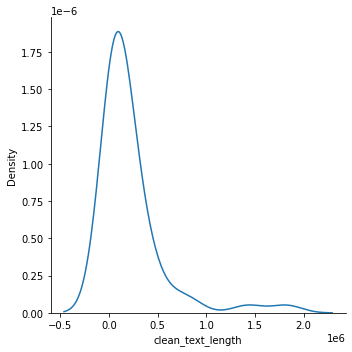

In [ ]:
sns.displot(data=loc2, x='clean_text_length', kind="kde")

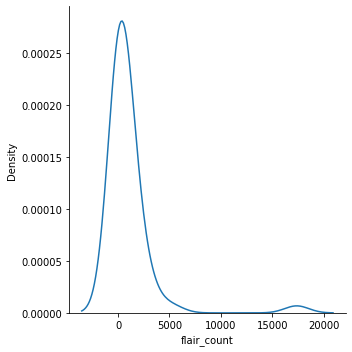

In [ ]:
sns.displot(data=loc2, x='flair_count', kind="kde")

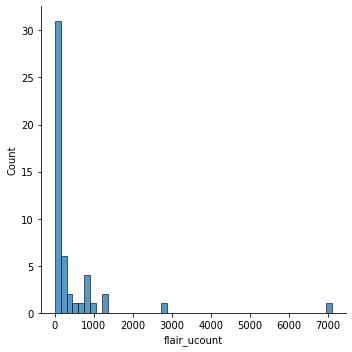

In [ ]:
sns.displot(data=loc2, x='flair_ucount', kind="hist")

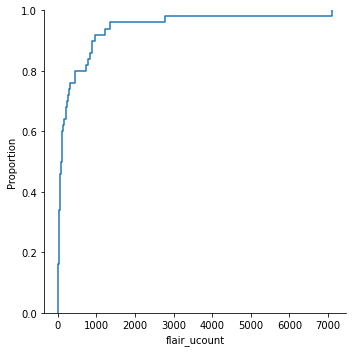

In [ ]:
sns.displot(data=loc2, x='flair_ucount', kind="ecdf")

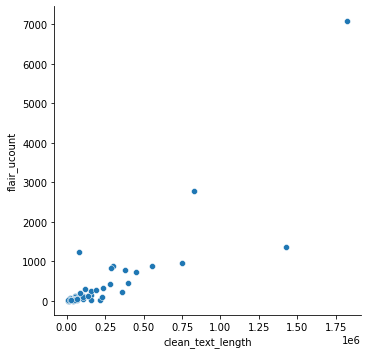

In [ ]:
sns.relplot(x='clean_text_length', y='flair_ucount', data=loc2)

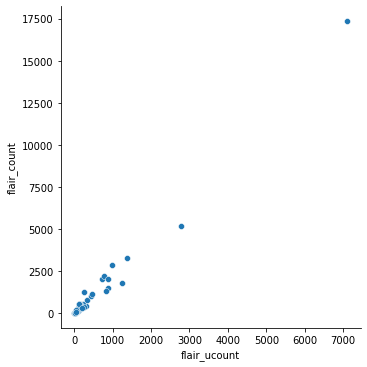

In [ ]:
sns.relplot(x='flair_ucount', y='flair_count', data=loc2)

## LOC Analysis: BP historic-ner-onb

In [ ]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

In [120]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_LOC_dbmdz-historic-ner-onb-I-full.csv'
with open(infile, 'r') as f:            
            loc3 = pd.read_csv(f, encoding="UTF-8", keep_default_na=False, nrows=50, skiprows=[32,40])


In [89]:
loc3[30:60]

,e_rara_id,historic-ner-onb,historic-ner-onb_clean,historic-ner-onb_concat
30,8000232,"[['Varia', 'S-LOC'], ['Stein', 'S-LOC'], ['Eis...","'Varia', 'S-LOC', 'Stein', 'S-LOC', 'Eisenbolg...","Varia, Stein, Eisenbolgen, Hausen, Meiring..."
31,22660710,"[['Nicca', 'S-LOC'], ['Aarberg', 'S-LOC'], ['B...","'Nicca', 'S-LOC', 'Aarberg', 'S-LOC', 'Bielers...","Nicca, Aarberg, Bielersee, Bietersee, Broy..."
32,7312733,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Bern, Schweiz, Wald, W..."
33,5711988,"[['Kern', 'S-LOC'], ['Bern', 'S-LOC'], ['Leipz...","'Kern', 'S-LOC', 'Bern', 'S-LOC', 'Leipzig', '...","Kern, Bern, Leipzig, Zrich, Basel, Bern, ..."
34,5711626,"[['Basel', 'S-LOC'], ['Frankreichs', 'S-LOC'],...","'Basel', 'S-LOC', 'Frankreichs', 'S-LOC', 'Nap...","Basel, Frankreichs, Napoleons, Bern, Galli..."
35,5709367,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Durheim, DISTANzjj, St...."
36,10826352,"[['Vaeia', 'S-LOC'], ['Bern', 'S-LOC'], ['Thun...","'Vaeia', 'S-LOC', 'Bern', 'S-LOC', 'Thun', 'S-...","Vaeia, Bern, Thun, Bern, Belp, Elfenau, ..."
37,17996385,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Solothurn,"
38,10733431,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Bern, Bern, Nils, Bern..."
39,9223676,"[['Emmenthal', 'S-LOC'], ['Signau', 'S-LOC'], ...","'Emmenthal', 'S-LOC', 'Signau', 'S-LOC', 'Burg...","Emmenthal, Signau, Burgdorf, Signau, Trach..."


In [ ]:
print(loc3['historic-ner-onb_concat'][0])

Missouri,  Nordamerika,  Diefibach,  Buren,  Gro-Affolterrn,  Bielersee,  Gerla,  Neuenstadt,  Bielersee,  Neuenburg,  Moos,  Murten,  Thun,  Bern,  Uttingenfiuh,  Jaberg,  Bern,  Diebach, 


In [121]:
loc3 = loc3.rename(columns={"historic-ner-onb_concat": "bpe"})

loc3['bpe_count'] = 0      # number of LOCs
loc3['bpe_ucount'] = 0     # number of unique LOCs
loc3['bpe_set'] = ''       # unique LOCs; set = unique values of list   
loc3['bpe_list'] = ''
for i in loc2.index:
    loc3['bpe_list'][i] = loc3.bpe[i].split(',  ')     # change str to list
    loc3['bpe_count'][i] = len(loc3.bpe_list[i])
    loc3['bpe_set'][i] = set(loc3.bpe_list[i])
    loc3['bpe_ucount'][i] = len(loc3.bpe_set[i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [91]:
loc3[30:60]

,e_rara_id,historic-ner-onb,historic-ner-onb_clean,bpe,bpe_count,bpe_ucount,bpe_set,bpe_list
30,8000232,"[['Varia', 'S-LOC'], ['Stein', 'S-LOC'], ['Eis...","'Varia', 'S-LOC', 'Stein', 'S-LOC', 'Eisenbolg...","Varia, Stein, Eisenbolgen, Hausen, Meiring...",1345,867,"{Haslern, Unterstra, Ringgcnbcrg, Wohlhnusen, ...","[Varia, Stein, Eisenbolgen, Hausen, Meiringen,..."
31,22660710,"[['Nicca', 'S-LOC'], ['Aarberg', 'S-LOC'], ['B...","'Nicca', 'S-LOC', 'Aarberg', 'S-LOC', 'Bielers...","Nicca, Aarberg, Bielersee, Bietersee, Broy...",13,11,"{Solothurn, Freiburg, Bietersee, Bern, Neuenbu...","[Nicca, Aarberg, Bielersee, Bietersee, Broye, ..."
32,7312733,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Bern, Schweiz, Wald, W...",20,9,"{Bern, , Bern, Jo Fr, Wald, Ausland, Nov, West...","[Bern, Bern, Bern, Bern, Schweiz, Wald, Westsc..."
33,5711988,"[['Kern', 'S-LOC'], ['Bern', 'S-LOC'], ['Leipz...","'Kern', 'S-LOC', 'Bern', 'S-LOC', 'Leipzig', '...","Kern, Bern, Leipzig, Zrich, Basel, Bern, ...",19694,6369,"{Leibundgut, Ramisberg, Eastelstetten, Drfch H...","[Kern, Bern, Leipzig, Zrich, Basel, Bern, Bern..."
34,5711626,"[['Basel', 'S-LOC'], ['Frankreichs', 'S-LOC'],...","'Basel', 'S-LOC', 'Frankreichs', 'S-LOC', 'Nap...","Basel, Frankreichs, Napoleons, Bern, Galli...",3287,989,"{Pierrc-Pertuis, Oberrheins, Hclvetia, Kanalga...","[Basel, Frankreichs, Napoleons, Bern, Gallien,..."
35,5709367,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Durheim, DISTANzjj, St....",4049,2019,"{, Wimmisbrcke, Wengi, Fenis, Bleyenback, Ness...","[Bern, Bern, Bern, Durheim, DISTANzjj, St. St...."
36,10826352,"[['Vaeia', 'S-LOC'], ['Bern', 'S-LOC'], ['Thun...","'Vaeia', 'S-LOC', 'Bern', 'S-LOC', 'Thun', 'S-...","Vaeia, Bern, Thun, Bern, Belp, Elfenau, ...",78,20,"{Bern, Aare, Bernfucn, - see, Bern, , Thun, Th...","[Vaeia, Bern, Thun, Bern, Belp, Elfenau, Bern,..."
37,17996385,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Solothurn,",4,2,"{Bern, Solothurn, }","[Bern, Bern, Bern, Solothurn, ]"
38,10733431,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","Bern, Bern, Bern, Bern, Bern, Nils, Bern...",9,4,"{Bern, Nils, Kanton, Neuenburg, }","[Bern, Bern, Bern, Bern, Bern, Nils, Bern, Kan..."
39,9223676,"[['Emmenthal', 'S-LOC'], ['Signau', 'S-LOC'], ...","'Emmenthal', 'S-LOC', 'Signau', 'S-LOC', 'Burg...","Emmenthal, Signau, Burgdorf, Signau, Trach...",346,160,"{Delsberg, Erlach, Baselland, Bern, Matten, Be...","[Emmenthal, Signau, Burgdorf, Signau, Trachsel..."


In [132]:
for i in loc3[39:40].bpe_list:
    print(i)

['Msern', 'Bieler', '- see', 'Aarberg', 'Bren', 'Mooses', 'Obermoos', 'Aarberg', 'Nidau', 'Erlach', 'Bern', 'Bren', 'Morgenthal', '- burger', 'Bielersee', 'Mooses', 'Uutermoos', 'Bern', 'Bern, ']


In [ ]:
type(loc3.bpe_set[4])

#### with 50's set

In [97]:
bpe_lens = []
for i in range(0,50):
    for j in range(0, loc3.bpe_count[i]):
        bpe_lens.append(len(loc3.bpe_list[i][j]))

In [98]:
pd.Series(bpe_lens).describe()

count    64648.000000
mean         7.489729
std          3.062073
min          0.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         42.000000
dtype: float64

In [87]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_bpe.csv"
with open(outfile, "w") as f:
    loc3.to_csv(f, index=False)  
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


### Analysis File

In [44]:
# load analysis file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_bpe.csv'
with open(infile, 'r') as f:            
            loc3 = pd.read_csv(f, encoding="UTF-8", nrows=50, skiprows=[32,40])    # skip rows without data   nrows=50, skiprows=[32,40]

In [ ]:
loc3.head(3)

,e_rara_id,historic-ner-onb,historic-ner-onb_clean,bpe,bpe_count,bpe_ucount,bpe_set
0,14432690,"[['Missouri', 'S-LOC'], ['Nordamerika', 'S-LOC...","'Missouri', 'S-LOC', 'Nordamerika', 'S-LOC', '...","['Missouri', 'Nordamerika', 'Diefibach', 'Bure...",18,16,"{'Nordamerika', 'Diefibach', 'Moos', 'Uttingen..."
1,1757509,"[['Bern', 'S-LOC'], ['Bern', 'S-LOC'], ['Postg...","'Bern', 'S-LOC', 'Bern', 'S-LOC', 'Postgaße', ...","['Bern', 'Bern', 'Postgae', 'Kefichga', 'Kirch...",1338,565,"{'Rfe', 'Falke', 'Aloy', 'Wolf', 'Schnegg', 'L..."
2,1397203,"[['Beru', 'S-LOC'], ['Bern', 'S-LOC'], ['Bern'...","'Beru', 'S-LOC', 'Bern', 'S-LOC', 'Bern', 'S-L...","['Beru', 'Bern', 'Bern', 'Bern', 'Bern', 'Bern...",6680,2872,"{'Buben', '', 'Kirebgasse', 'Strki', 'Schnegg'..."


In [ ]:
type(loc3.bpe_set[4])

str

In [46]:
loc3.bpe_ucount.describe()

count      50.000000
mean      460.940000
std      1029.267293
min         0.000000
25%        31.500000
50%        99.000000
75%       422.500000
max      6369.000000
Name: bpe_ucount, dtype: float64

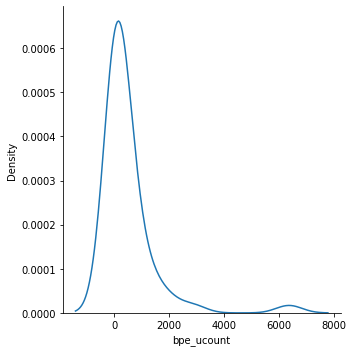

In [ ]:
sns.displot(data=loc3, x='bpe_ucount', kind="kde")

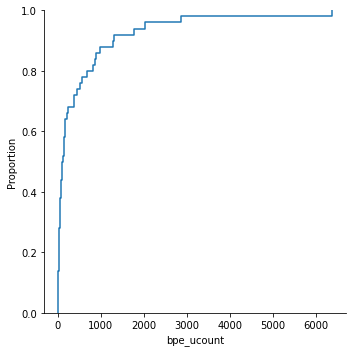

In [ ]:
sns.displot(data=loc3, x='bpe_ucount', kind="ecdf")

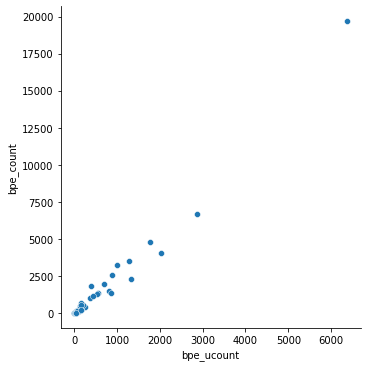

In [ ]:
sns.relplot(x='bpe_ucount', y='bpe_count', data=loc3)

## LOC Analysis: Comparison

 https://realpython.com/python-sets/

### Spacy - Flair

In [432]:
locs = pd.DataFrame(columns = ['e_rara_id', 'text_len', 'intersect', 'intersect_c', 'diff_spacy', 'diff_spacy_c', \
                               'diff_flair', 'diff_flair_c', 'sym_diff', 'sym_diff_c'], index=range(50))

for i in range(0,50):
    locs.e_rara_id[i] = loc['e_rara_id'][i]
    locs.text_len[i] = loc['clean_text_length'][i]
    locs.intersect[i] = loc['spacy_set'][i].intersection(loc2['flair_set'][i])   # LOCs in both
    locs.intersect_c[i] = len(locs.intersect[i])
    locs.diff_spacy[i] = loc['spacy_set'][i].difference(loc2['flair_set'][i])    # LOCs in spacy, but not in flair
    locs.diff_spacy_c[i] = len(locs.diff_spacy[i])
    locs.diff_flair[i] = loc2['flair_set'][i].difference(loc['spacy_set'][i])    # LOCs in flair, but not in spacy
    locs.diff_flair_c[i] = len(locs.diff_flair[i])
    locs.sym_diff[i] = loc['spacy_set'][i].symmetric_difference(loc2['flair_set'][i])  # only in either set / opposite to intersection
    locs.sym_diff_c[i] = len(locs.sym_diff[i])


In [431]:
locs[4:6]

,e_rara_id,text_len,intersect,intersect_c,diff_flair,diff_flair_c,diff_bpe,diff_bpe_c,sym_diff,sym_diff_c
4,23306869,356339,"{'Neuengasse', 'Altenberg', 'Bellelay', 'Murte...",81,"{'Samariterverein', 'Waisenasyl', 'Weißenheim'...",146,"{'', 'Cciliatag', 'Kornhaus', 'Lan', 'Zrich', ...",126,"{'', 'Cciliatag', 'geistkirch', 'Weißenheim', ...",272
5,11136199,107875,"{'Siebenthal', 'Waadt', 'Gunten', 'Habsburgs',...",45,"{'Die Lerau', 'Tlnmersee', 'Interlaken', 'Hohe...",84,"{'Hochburgund', 'Scherzi', 'Lerau', 'Merligen'...",63,"{'Lerau', 'Merligen', 'Balm', 'Interlaken', '-...",147


In [387]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_match_spacy_flair.csv"
with open(outfile, "w") as f:
    locs.to_csv(f, index=False)  
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


In [388]:
# load analysis file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_match_spacy_flair.csv'
with open(infile, 'r') as f:            
            locs = pd.read_csv(f, encoding="UTF-8")

In [ ]:
locs.head(3)

,e_rara_id,text_len,intersect,intersect_c,diff_spacy,diff_spacy_c,diff_flair,diff_flair_c,sym_diff,sym_diff_c
0,14432690,46334,"{'Ruhr', 'Hüls', 'Gerlafingen', 'Aare', 'Biele...",9,"{'', 'Lebet', 'Hin', 'Welche', 'Wunden', 'Tren...",64,"{'Nordamerika', 'Bielersee Dorfe Gerlafingen',...",5,"{'', 'Nordamerika', 'Erde', 'Lebet', 'Umschlin...",69
1,1757509,49807,"{'Wittwe', 'Altenberg', 'Cmannel', 'Brunn', 'K...",54,"{'', 'Christian', 'Hotellaube Ober-EhegerichtS...",204,"{'Judengaße', 'Ludw', 'Kornhausplatz', 'Pfäffl...",66,"{'', 'Kefichgäßlein', 'Hotellaube Ober-Ehegeri...",270
2,1397203,830914,"{'Schwellenmätteli', 'Uhrenmacher', 'Neuengass...",1109,"{'', 'Rathhauses', 'Bütscheleck', 'Vuicle', 'G...",2056,"{'Beim Hasenbrunnen Gipfel', 'Kirebgasse', '87...",1677,"{'Beim Hasenbrunnen Gipfel', 'Kirebgasse', '',...",3733


In [ ]:
#locs = locs.convert_dtypes() 

In [ ]:
locs.dtypes

In [390]:
locs.intersect_c.describe()

count      50.000000
mean      212.820000
std       536.797331
min         1.000000
25%        17.000000
50%        50.000000
75%       182.500000
max      3623.000000
Name: intersect_c, dtype: float64

In [433]:
share = pd.DataFrame(columns = ['spacy', 'flair'], index=range(50))

for i in range(0,50):
    share.spacy[i] = locs.intersect_c[i] / loc.spacy_ucount[i]
    share.flair[i] = locs.intersect_c[i] / loc2.flair_ucount[i]
    

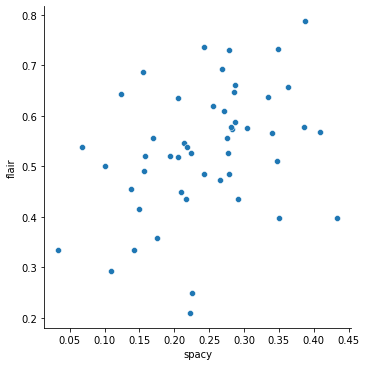

In [434]:
sns.relplot(y='flair', x='spacy', data=share)

### Spacy - BPE

In [436]:
locs = pd.DataFrame(columns = ['e_rara_id', 'text_len', 'intersect', 'intersect_c', 'diff_spacy', 'diff_spacy_c', \
                               'diff_bpe', 'diff_bpe_c', 'sym_diff', 'sym_diff_c'], index=range(50))

for i in range(0,50):
    locs.e_rara_id[i] = loc['e_rara_id'][i]
    locs.text_len[i] = loc['clean_text_length'][i]
    locs.intersect[i] = loc['spacy_set'][i].intersection(loc3['bpe_set'][i])   # LOCs in both
    locs.intersect_c[i] = len(locs.intersect[i])
    locs.diff_spacy[i] = loc['spacy_set'][i].difference(loc3['bpe_set'][i])    # LOCs in spacy, but not in flair
    locs.diff_spacy_c[i] = len(locs.diff_spacy[i])
    locs.diff_bpe[i] = loc3['bpe_set'][i].difference(loc['spacy_set'][i])    # LOCs in flair, but not in spacy
    locs.diff_bpe_c[i] = len(locs.diff_bpe[i])
    locs.sym_diff[i] = loc['spacy_set'][i].symmetric_difference(loc3['bpe_set'][i])  # only in either set / opposite to intersection
    locs.sym_diff_c[i] = len(locs.sym_diff[i])


In [392]:
locs

,e_rara_id,text_len,intersect,intersect_c,diff_spacy,diff_spacy_c,diff_bpe,diff_bpe_c,sym_diff,sym_diff_c
0,14432690,46334,"{Diefibach, Thun, Bielersee, Murten, Jaberg, N...",7,"{, Lebet, Hin, Welche, Wunden, Aare, Trennungö...",66,"{Nordamerika, Moos, Gerla, Gro-Affolterrn, Mis...",9,"{, Lebet, Hin, Welche, Wunden, Aare, Trennungö...",75
1,1757509,49807,"{Lamotte, Altenberg, Cmannel, Wittwe, Christia...",47,"{, Kirchgaße, Hotellaube Ober-EhegerichtSschre...",211,"{Rfe, Falke, Wolf, Aloy, Schnegg, Lauterburg-B...",518,"{Rfe, Falke, , Aloy, Wolf, Schnegg, Lauterburg...",729
2,1397203,830914,"{, Neuengasse, StessiSbnrg, Erguel, Lombach, A...",666,"{Rathhauses, Bütscheleck, Vuicle, Gefängnißwär...",2499,"{Buben, Kirebgasse, Strki, Schnegg, Leberberg,...",2206,"{Rathhauses, Strki, Leberberg, Weinmonat, Simm...",4705
3,9119958,120644,"{Bieln, Burggasse, Augsburg, Schlotz, Bellelay...",93,"{, Erguel, 182Y, Ses Itillsrs, Fürstenhause, D...",508,"{Bielna, Blaise, Cuternau, Diesbacb, Landstrae...",152,"{, Erguel, 182Y, Cuternau, Oher, Ses Itillsrs,...",660
4,23306869,356339,"{, Altenberg, Kornhaus, Schweiz, Nydeckkirche,...",71,"{Kostgeldern, Knabeuwaisenhaus, Arbeitsnachwei...",539,"{Neuengasse, Cciliatag, Lan, Zrich, Morlot, Di...",136,"{Neuengasse, Cciliatag, Kostgeldern, Knabeuwai...",675
5,11136199,107875,"{Scherzi, Lerau, Merligen, Mattland, Siebentha...",49,"{, Kloster Interlaken, Pappel-, Moränenhügel, ...",264,"{Hochburgund, Gttibach, - strasse, Neu-Rttli, ...",59,"{, Pappel-, Bliithenmeer Thal, Thuner-, Balm, ...",323
6,9279581,53021,"{Pfandersmatt, Belpsee, Schweiz, Selhosen, Kon...",50,"{, ""Aelps"", Nivellierungen, Ltadt, Kirchhöri, ...",150,"{Dornbhl, Em, Walo, Nikl, Bend, Ln, Kniz, Sche...",76,"{, Ln, Ltadt, Kirchhöri, -, Oberamtes Seftigen...",226
7,11218655,17451,"{Breenberg, Interlaken, Diessbach, Goumoens-Wu...",25,"{Fräulein lohanna, Pferderast, Studer, Heem Jo...",38,"{Brunnen, Wouwermann, Roos, Ecole, Orleans, Ma...",141,"{Brunnen, Wouwermann, Paysage, Roos, Ecole, Or...",179
8,13805570,450596,"{Pfandersmatt, Kastvogt, Oesterreichs, Tsching...",232,"{St. Martin Nov, Nächsten, Landgerichtes Sefti...",1033,"{Schnegg, Diebach, Urnengrab, Riggisberg Rti, ...",451,"{Schnegg, Alpengipfels, Metten-, Obstertrag, T...",1484
9,22562653,37430,"{Bucbeggberg, Solvthurn, Waadt, Aare, Aarberg,...",26,"{Jucharwn, Erde, Uebersichtsplane, demJnsberg,...",71,"{Weidorn, Schwarzdorn, Attisholz.2657682, Moos...",22,"{Jucharwn, Uebersichtsplane, demJnsberg, ""Bure...",93


In [393]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_match_spacy_bpe.csv"
with open(outfile, "w") as f:
    locs.to_csv(f, index=False)  
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


In [394]:
# load analysis file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_match_spacy_bpe.csv'
with open(infile, 'r') as f:            
            locs = pd.read_csv(f, encoding="UTF-8")

In [395]:
locs.head(3)

,e_rara_id,text_len,intersect,intersect_c,diff_spacy,diff_spacy_c,diff_bpe,diff_bpe_c,sym_diff,sym_diff_c
0,14432690,46334,"{'Diefibach', 'Thun', 'Bielersee', 'Murten', '...",7,"{'', 'Lebet', 'Hin', 'Welche', 'Wunden', 'Aare...",66,"{'Nordamerika', 'Moos', 'Gerla', 'Gro-Affolter...",9,"{'', 'Lebet', 'Hin', 'Welche', 'Wunden', 'Aare...",75
1,1757509,49807,"{'Lamotte', 'Altenberg', 'Cmannel', 'Wittwe', ...",47,"{'', 'Kirchgaße', 'Hotellaube Ober-EhegerichtS...",211,"{'Rfe', 'Falke', 'Wolf', 'Aloy', 'Schnegg', 'L...",518,"{'Rfe', 'Falke', '', 'Aloy', 'Wolf', 'Schnegg'...",729
2,1397203,830914,"{'', 'Neuengasse', 'StessiSbnrg', 'Erguel', 'L...",666,"{'Rathhauses', 'Bütscheleck', 'Vuicle', 'Gefän...",2499,"{'Buben', 'Kirebgasse', 'Strki', 'Schnegg', 'L...",2206,"{'Rathhauses', 'Strki', 'Leberberg', 'Weinmona...",4705


In [ ]:
#locs = locs.convert_dtypes() 

In [338]:
locs.dtypes

e_rara_id        int64
text_len         int64
intersect       object
intersect_c      int64
diff_spacy      object
diff_spacy_c     int64
diff_bpe        object
diff_bpe_c       int64
sym_diff        object
sym_diff_c       int64
dtype: object

In [397]:
locs.sym_diff_c.describe()

count       50.000000
mean       886.220000
std       1848.947834
min         12.000000
25%         84.250000
50%        274.500000
75%        924.750000
max      11858.000000
Name: sym_diff_c, dtype: float64

In [439]:
share = pd.DataFrame(columns = ['spacy', 'bpe'], index=range(50))

for i in range(0,50):
    share.spacy[i] = locs.intersect_c[i] / loc.spacy_ucount[i]
    share.bpe[i] = locs.intersect_c[i] / loc3.bpe_ucount[i]


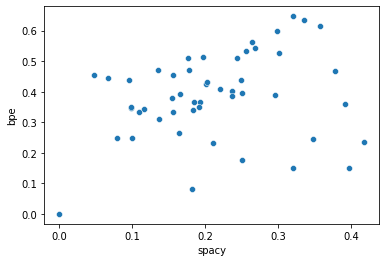

In [442]:
sns.scatterplot(x='spacy', y='bpe', data=share)

### Flair - BPE

In [398]:
locs = pd.DataFrame(columns = ['e_rara_id', 'text_len', 'intersect', 'intersect_c', 'diff_flair', 'diff_flair_c', \
                               'diff_bpe', 'diff_bpe_c', 'sym_diff', 'sym_diff_c'], index=range(50))

for i in range(0,50):
    locs.e_rara_id[i] = loc['e_rara_id'][i]
    locs.text_len[i] = loc['clean_text_length'][i]
    locs.intersect[i] = loc2['flair_set'][i].intersection(loc3['bpe_set'][i])   # LOCs in both
    locs.intersect_c[i] = len(locs.intersect[i])
    locs.diff_flair[i] = loc2['flair_set'][i].difference(loc3['bpe_set'][i])    # LOCs in spacy, but not in flair
    locs.diff_flair_c[i] = len(locs.diff_flair[i])
    locs.diff_bpe[i] = loc3['bpe_set'][i].difference(loc2['flair_set'][i])    # LOCs in flair, but not in spacy
    locs.diff_bpe_c[i] = len(locs.diff_bpe[i])
    locs.sym_diff[i] = loc2['flair_set'][i].symmetric_difference(loc3['bpe_set'][i])  # only in either set / opposite to intersection
    locs.sym_diff_c[i] = len(locs.sym_diff[i])


In [399]:
locs

,e_rara_id,text_len,intersect,intersect_c,diff_flair,diff_flair_c,diff_bpe,diff_bpe_c,sym_diff,sym_diff_c
0,14432690,46334,"{Nordamerika, Thun, Missouri, Murten, Bielerse...",8,"{Ruhr, Bielersee Dorfe Gerlafingen, Ammerzwyl,...",6,"{Diefibach, Moos, Gerla, Gro-Affolterrn, Buren...",8,"{Diefibach, Bielersee Dorfe Gerlafingen, Moos,...",14
1,1757509,49807,"{Wittwe, Altenberg, Cmannel, Ludw, Keilbach, B...",41,"{Judengaße, Kirchgaße, Kefichgäßlein, Rummel, ...",79,"{Rfe, Falke, Aloy, Wolf, Schnegg, Lauterburg-B...",524,"{Rfe, Falke, Aloy, Wolf, Schnegg, Lauterburg-B...",603
2,1397203,830914,"{Kirebgasse, Neuengasse, Junkern, Oldenburg, K...",800,"{Beim Hasenbrunnen Gipfel, 87t, Bannwärt, Madi...",1986,"{Buben, , Strki, Schnegg, Leberberg, Lan, Lase...",2072,"{Buben, , Beim Hasenbrunnen Gipfel, Strki, Sch...",4058
3,9119958,120644,"{Burggasse, Augsburg, Diesbacb, Bellelay, Twan...",87,"{Deyers Wilbermett, DatthvsBause, Erguel, Säß,...",212,"{Bieln, Bielna, Blaise, Cuternau, Landstrae, S...",158,"{Erguel, Cuternau, Sis, Batur, Llntergasse, Oh...",370
4,23306869,356339,"{Neuengasse, Altenberg, Bellelay, Murten, Nyde...",81,"{Samariterverein, Waisenasyl, Weißenheim, geis...",146,"{, Cciliatag, Kornhaus, Lan, Zrich, Morlot, Di...",126,"{, Cciliatag, geistkirch, Weißenheim, Lan, Mat...",272
5,11136199,107875,"{Siebenthal, Waadt, Gunten, Habsburgs, Murten,...",45,"{Die Lerau, Tlnmersee, Interlaken, Hohenegg Ro...",84,"{Hochburgund, Scherzi, Lerau, Merligen, Mattla...",63,"{Lerau, Merligen, Balm, Interlaken, -, Rothlio...",147
6,9279581,53021,"{Pfandersmatt, Schenkenberg, Schweiz, Selhosen...",48,"{Pandora, Stammburg, Feste Belp, Gex, Dornbühl...",57,"{Ln, -, Khlewyl, Seelhofen, Grbe, Gerzensee, W...",78,"{Pandora, Ln, -, Kander, Khlewyl, Längenberges...",135
7,11218655,17451,"{Diessbach, Schweiz, Breenberg, Paris, Wattenw...",13,"{Bredaei Schlachtenbild, Fr, Ecole espagnole C...",54,"{Brunnen, Wouwermann, Roos, Ecole, Orleans, Ma...",153,"{Brunnen, Bredaei Schlachtenbild, Wouwermann, ...",207
8,13805570,450596,"{Pfandersmatt, Lauenberg, Tschingelgrabens, Gs...",247,"{Fultigen, Schübelmatte, Dorfbaches, Gurnigelb...",481,"{Schnegg, Diebach, Urnengrab, Riggisberg Rti, ...",436,"{Schnegg, Diebach, Riggisberg Rti, Urnengrab, ...",917
9,22562653,37430,"{Bucbeggberg, Solvthurn, Waadt, Aare, Aarberg,...",24,"{Brügg, Senenwande, GraSbau, Kubikniß, Daö, Ba...",13,"{Weidorn, Schwarzdorn, Attisholz.2657682, Moos...",24,"{Brügg, Senenwande, Daö, Weidorn, Attisholz.26...",37


In [400]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_match_flair_bpe.csv"
with open(outfile, "w") as f:
    locs.to_csv(f, index=False)  
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


In [401]:
# load analysis file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_match_flair_bpe.csv'
with open(infile, 'r') as f:            
            locs = pd.read_csv(f, encoding="UTF-8")

In [347]:
locs.head(3)

,e_rara_id,text_len,intersect,intersect_c,diff_flair,diff_flair_c,diff_bpe,diff_bpe_c,sym_diff,sym_diff_c
0,14432690,46334,"{'Nordamerika', 'Thun', 'Missouri', 'Murten', ...",8,"{'Ruhr', 'Bielersee Dorfe Gerlafingen', 'Ammer...",6,"{'Diefibach', 'Moos', 'Gerla', 'Gro-Affolterrn...",8,"{'Diefibach', 'Bielersee Dorfe Gerlafingen', '...",14
1,1757509,49807,"{'Wittwe', 'Altenberg', 'Cmannel', 'Ludw', 'Ke...",41,"{'Judengaße', 'Kirchgaße', 'Kefichgäßlein', 'R...",79,"{'Rfe', 'Falke', 'Aloy', 'Wolf', 'Schnegg', 'L...",524,"{'Rfe', 'Falke', 'Aloy', 'Wolf', 'Schnegg', 'L...",603
2,1397203,830914,"{'Kirebgasse', 'Neuengasse', 'Junkern', 'Olden...",800,"{'Beim Hasenbrunnen Gipfel', '87t', 'Bannwärt'...",1986,"{'Buben', '', 'Strki', 'Schnegg', 'Leberberg',...",2072,"{'Buben', '', 'Beim Hasenbrunnen Gipfel', 'Str...",4058


In [ ]:
#locs = locs.convert_dtypes() 

In [348]:
locs.dtypes

e_rara_id        int64
text_len         int64
intersect       object
intersect_c      int64
diff_flair      object
diff_flair_c     int64
diff_bpe        object
diff_bpe_c       int64
sym_diff        object
sym_diff_c       int64
dtype: object

In [403]:
locs.intersect_c.describe()

count      50.000000
mean      162.780000
std       367.672175
min         1.000000
25%        13.250000
50%        41.500000
75%       165.500000
max      2415.000000
Name: intersect_c, dtype: float64

In [409]:
share = pd.DataFrame(columns = ['bpe', 'flair'], index=range(50))

for i in range(0,50):
    share.bpe[i] = locs.intersect_c[i] / loc3.bpe_ucount[i]
    share.flair[i] = locs.intersect_c[i] / loc2.flair_ucount[i]
    

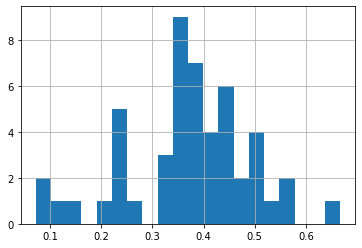

In [417]:
share.bpe.hist(bins=20)

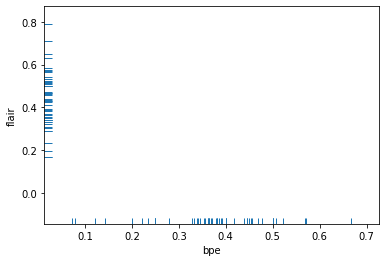

In [420]:
sns.rugplot(data=share, x='bpe',y='flair')

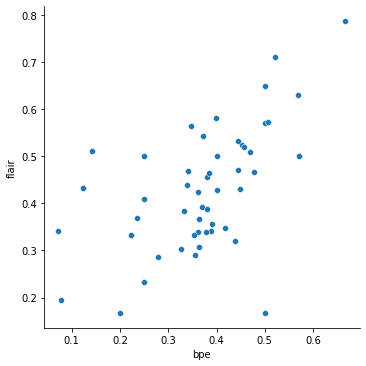

In [425]:
sns.relplot(data=share, x='bpe',y='flair')

In [ ]:
corr()

### Metadata

In [144]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_metadata/metadata_2021-02-28.csv'
with open(infile, 'r') as f:            
            md = pd.read_csv(f, encoding="UTF-8", usecols=['e_rara_id', 'title', 'startdate', 'dateissued'], nrows=50, skiprows=[32,40]) #

In [154]:
for i in md[md.e_rara_id==17996385].title:
    print(i)

Ehrerbietige Vorstellung des großen Kantonalvereins im Kanton Bern, welcher sich zu Aufhebung von eingeschlichenen Mißbräuchen und Vorrechten in Allmend-, Holz- und Weidrechtsamen aus mehr denn hundert Gemeinden constituirt hat an den Tit. Regierungsrath der Republik Bern : Im Sand, den 7. Christmonat 1835


In [146]:
md

,e_rara_id,title,dateissued,startdate
0,14432690,Abschiedslieder der nach dem Staat Missouri au...,1837,1837
1,1757509,Adressbuch der Stadt Bern,1822,1822
2,1397203,Adressenbuch der Republik Bern für Wissenschaf...,1836,1836
3,16830696,Aktensammlung zur Geschichte der Berner-Reform...,1923,1923
4,9119958,Das alte Biel und seine Umgebung [Tafeln u. A...,1902,1902
5,23306869,Die Armenpflege der Stadt Bern und die von ih...,1889,1889
6,11136199,Auf der rechtsseitigen Thunersee-Strasse von T...,1885,1885
7,9279581,Aus Belps Vergangenheit,1898,1898
8,11218655,Ausstellung von alten Bildern aus Privatbesitz...,1896,1896
9,20004520,Bärndütsch als Spiegel bernischen Volkstums,1905-1927,1905


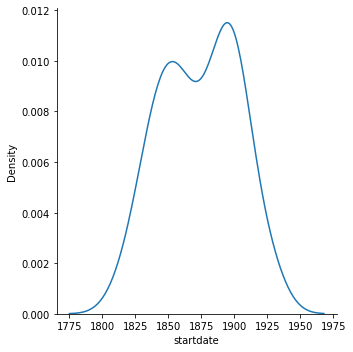

In [19]:
sns.displot(data=md, x='startdate', kind="kde")

In [ ]:
locs = locs.join(md, rsuffix='x').drop(columns='e_rara_idx')

In [ ]:
# Write to Google Drive
%cd /content/drive/My\ Drive/e_rara_analysis
outfile = "./LOC_spacy_flair.csv"
with open(outfile, "w") as f:
    locs.to_csv(f, index=False)   # columns=['e_rara_id', 'ner-multi-fast-I']
%cd /content/
print("Saved to file to Google Drive.")

/content/drive/My Drive/e_rara_analysis
/content
Saved to file to Google Drive.


In [ ]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_spacy_flair.csv'
with open(infile, 'r') as f:            
            locs = pd.read_csv(f, encoding="UTF-8")

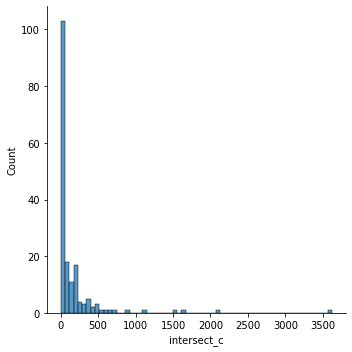

In [ ]:
sns.displot(data=locs, x='intersect_c', kind="hist")

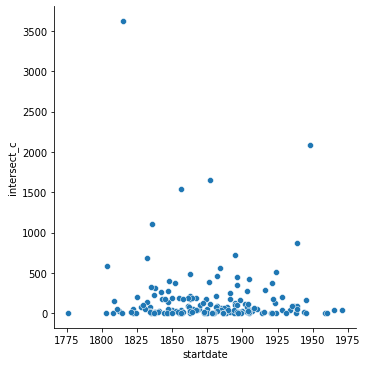

In [ ]:
sns.relplot(x='startdate', y='intersect_c', data=locs)

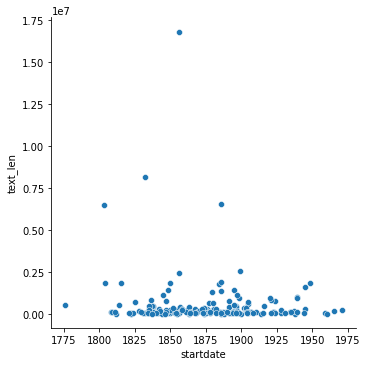

In [ ]:
sns.relplot(x='startdate', y='text_len', data=locs)

In [ ]:
round(locs.intersect_c.describe(),0)

count     176.0
mean      157.0
std       380.0
min         0.0
25%         8.0
50%        40.0
75%       170.0
max      3623.0
Name: intersect_c, dtype: float64

In [ ]:
round(locs.sym_diff_c.describe(),0)

count      176.0
mean      1150.0
std       2883.0
min          6.0
25%         84.0
50%        282.0
75%        843.0
max      21357.0
Name: sym_diff_c, dtype: float64

In [ ]:
round(locs.diff_flair_c.describe(),0)

count     176.0
mean      183.0
std       464.0
min         0.0
25%         7.0
50%        32.0
75%       124.0
max      3476.0
Name: diff_flair_c, dtype: float64

In [ ]:
round(locs.diff_spacy_c.describe(),0)

count      176.0
mean       966.0
std       2688.0
min          5.0
25%         61.0
50%        223.0
75%        640.0
max      21357.0
Name: diff_spacy_c, dtype: float64


 ### tf-idf – Term Frequency – Inverse Document Frequency

importance ~ appearances(term, document) / count(documents containing term in collection)


* tf = count(word, document) / len(document)
* idf = log( len(collection) / count(document_containing_term, collection)
* tf-idf = tf * idf

### Matchings

In [35]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_analysis/LOC_match_flair_bpe.csv'
with open(infile, 'r') as f:            
            match = pd.read_csv(f, encoding="UTF-8")

In [37]:
match.sym_diff_c.describe()

count      50.000000
mean      605.220000
std      1374.701887
min         4.000000
25%        37.500000
50%       143.000000
75%       544.250000
max      8638.000000
Name: sym_diff_c, dtype: float64